In [ ]:
%tensorflow_version 2.x

# Importación de librerías

In [ ]:
# LIBRERÍAS BÁSICAS
import matplotlib.pyplot as plt
import numpy as np
# LIBRERÍAS DE IA
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
# LIBRERÍAS PARA EL MANEJO DE ARHIVOS
import os
# LIBRERÍAS PARA EL MANERJO DE MÉTRICAS
from sklearn.metrics import classification_report, confusion_matrix

# Rutas de trabajo

In [ ]:
# RUTAS DE TRABJO

#RUTA PRINCIPAL
PATH = "/content/drive/My Drive/SENA/SENNOVA/Red Colsi/2020/Sistema"
#RUTA DEL DATASET COMPLETO
DATASET = PATH+"/dataset"
#RUTA DEL CONJUNTO DE DATOS DE ENTRENAMIENTO
DATA_TRAIN = DATASET+"/train"
#RUTA DEL CONJUNTO DE DATOS DE TESTEO
DATA_TEST = DATASET+"/test"

In [ ]:
categorias = os.listdir(DATA_TRAIN)
numCategorias = len(categorias)

print("Categorias: "+str(categorias))
print("Numero de Categorias: "+str(numCategorias))

Categorias: ['healthy', 'red_spider_mite', 'rust_level_1', 'rust_level_2', 'rust_level_3', 'rust_level_4']
Numero de Categorias: 6


In [ ]:
IMG_ANCHO = 448
IMG_ALTO = 256

In [ ]:
def resize(imagen,altura,ancho):
  resultado = tf.image.resize(imagen,[altura,ancho])
  return resultado

In [ ]:
def normalizar(imagen):
  return imagen/127.5-1

### DATOS DE ENTRENAMIENTO

In [ ]:
nombres_train = []
categorias_train = []
totalDatos_train = 0
for i in range(numCategorias):
  numImagenesPorCategoria = len(os.listdir(DATA_TRAIN+"/"+categorias[i]))
  for j in range(numImagenesPorCategoria):
    nombres_train.append(os.listdir(DATA_TRAIN+"/"+categorias[i])[j])
    categorias_train.append(categorias[i])
    totalDatos_train+=1
print("Número total de datos de entrenamiento: "+str(totalDatos_train))

Número total de datos de entrenamiento: 934


### DATOS DE TESTEO

In [ ]:
nombres_test = []
categorias_test = []
totalDatos_test = 0
for i in range(numCategorias):
  numImagenesPorCategoria = len(os.listdir(DATA_TEST+"/"+categorias[i]))
  for j in range(numImagenesPorCategoria):
    nombres_test.append(os.listdir(DATA_TEST+"/"+categorias[i])[j])
    categorias_test.append(categorias[i])
    totalDatos_test+=1
print("Número total de datos de testeo: "+str(totalDatos_test))

Número total de datos de testeo: 315


In [ ]:
def cargar_imagen(tipo,carpeta,nombre):
  imagen = tf.cast(tf.image.decode_png(tf.io.read_file(DATASET+"/"+tipo+"/"+carpeta+"/"+nombre+"/"+nombre)),tf.float32)[...,:3]
  imagen = resize(imagen,IMG_ALTO,IMG_ANCHO)
  imagen = normalizar(imagen)
  categoria = np.zeros([1,numCategorias])
  for i in range(numCategorias):
    if(carpeta == categorias[i]): 
      categoria[0,i] = 1

  return imagen,categoria

### SE CARGA IMÁGEN DE PRUEBA

La imagen pertenece a la categoria: 0


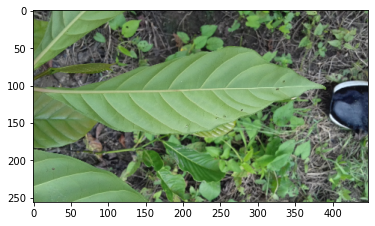

In [ ]:
imagen_prueba = cargar_imagen("train","healthy","C1P1E1.jpg")
plt.imshow(imagen_prueba[0]*0.5+0.5)
print("La imagen pertenece a la categoria: "+str(np.argmax(imagen_prueba[1])))

### CONSTRUCCIÓN DEL DATASET DE ENTRENAMIENTO

In [ ]:
dataset_train = []
for i in range(totalDatos_train):
  dataset_train.append(cargar_imagen("train",categorias_train[i],nombres_train[i]))
  print('\r','Datos cargados: '+str(i+1),end='')

 Datos cargados: 934

In [ ]:
x_train = np.zeros([len(dataset_train),IMG_ALTO,IMG_ANCHO,3])
y_train = np.zeros([len(dataset_train),numCategorias])

for i in range(len(dataset_train)):
  x_train[i] = dataset_train[i][0]
  y_train[i] = dataset_train[i][1]

### CONSTRUCCIÓN DEL DATASET DE TESTEO

In [ ]:
dataset_test = []
for i in range(totalDatos_test):
  dataset_test.append(cargar_imagen("test",categorias_test[i],nombres_test[i]))
  print('\r','Datos cargados: '+str(i+1),end='')

 Datos cargados: 315

In [ ]:
x_test = np.zeros([len(dataset_test),IMG_ALTO,IMG_ANCHO,3])
y_test = np.zeros([len(dataset_test),numCategorias])

for i in range(len(dataset_test)):
  x_test[i] = dataset_test[i][0]
  y_test[i] = dataset_test[i][1]

# CONSTRUCCIÓN DEL MODELO

In [ ]:
modelo = models.load_model(PATH+'/modelo.h5')
modelo.load_weights(PATH+'/pesos.h5')

# CONSTRUCCIÓN DEL MODELO

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(16, kernel_size=3,padding='same',input_shape=(IMG_ALTO,IMG_ANCHO,3)))
modelo.add(tf.keras.layers.LeakyReLU(alpha=0.2))
modelo.add(MaxPool2D())
modelo.add(Conv2D(32, kernel_size=3,padding='same'))
modelo.add(tf.keras.layers.LeakyReLU(alpha=0.2))
modelo.add(MaxPool2D())
modelo.add(Conv2D(64, kernel_size=3,padding='same'))
modelo.add(tf.keras.layers.LeakyReLU(alpha=0.2))
modelo.add(MaxPool2D())
modelo.add(Conv2D(128, kernel_size=3,padding='same'))
modelo.add(tf.keras.layers.LeakyReLU(alpha=0.2))
modelo.add(MaxPool2D())
modelo.add(Conv2D(256, kernel_size=3,padding='same'))
modelo.add(tf.keras.layers.LeakyReLU(alpha=0.2))
modelo.add(MaxPool2D())
modelo.add(Conv2D(512, kernel_size=3,padding='same'))
modelo.add(tf.keras.layers.LeakyReLU(alpha=0.2))
modelo.add(MaxPool2D())
modelo.add(Flatten())
modelo.add(Dense(1024,activation='relu'))
modelo.add(Dense(512,activation='relu'))
modelo.add(Dense(numCategorias,activation='softmax'))
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 256, 448, 16)      448       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 256, 448, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 224, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 128, 224, 32)      4640      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 128, 224, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 112, 32)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 112, 64)      

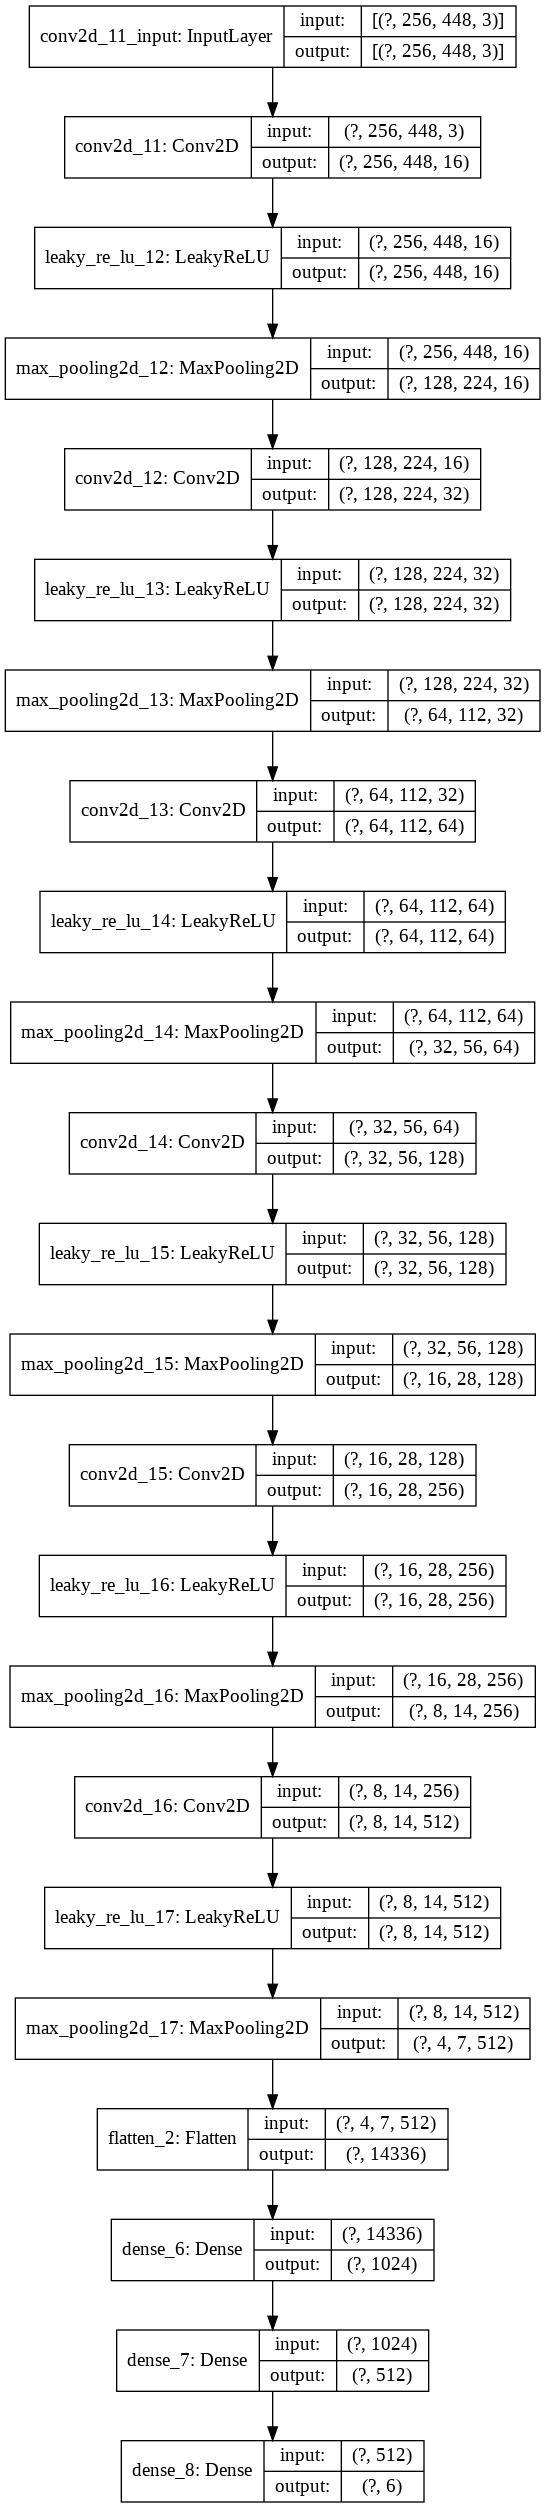

In [ ]:
dot_img_file = PATH+'/model_1.png'
tf.keras.utils.plot_model(modelo, to_file=dot_img_file, show_shapes=True)

In [ ]:
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=[
                        'accuracy',
                        'mean_squared_error',
                        ]
               )

In [ ]:
modelo.fit(x_train,y_train,epochs=30,validation_data=(x_test, y_test))
history = modelo.history.history

Epoch 1/30
30/30 [==============================] - 5s 155ms/step - loss: 1.6252 - accuracy: 0.4433 - mean_squared_error: 0.1258 - val_loss: 1.3832 - val_accuracy: 0.5048 - val_mean_squared_error: 0.1125
Epoch 2/30
30/30 [==============================] - 4s 119ms/step - loss: 1.3721 - accuracy: 0.5086 - mean_squared_error: 0.1121 - val_loss: 1.3857 - val_accuracy: 0.5048 - val_mean_squared_error: 0.1133
Epoch 3/30
30/30 [==============================] - 4s 120ms/step - loss: 1.3595 - accuracy: 0.5043 - mean_squared_error: 0.1110 - val_loss: 1.3389 - val_accuracy: 0.5048 - val_mean_squared_error: 0.1085
Epoch 4/30
30/30 [==============================] - 4s 118ms/step - loss: 1.3454 - accuracy: 0.5064 - mean_squared_error: 0.1095 - val_loss: 1.3740 - val_accuracy: 0.5048 - val_mean_squared_error: 0.1118
Epoch 5/30
30/30 [==============================] - 4s 119ms/step - loss: 1.3299 - accuracy: 0.5182 - mean_squared_error: 0.1078 - val_loss: 1.3257 - val_accuracy: 0.4952 - val_mean_sq

In [ ]:
modelo.save(PATH+"/modelo.h5")
modelo.save_weights(PATH+"/pesos.h5")

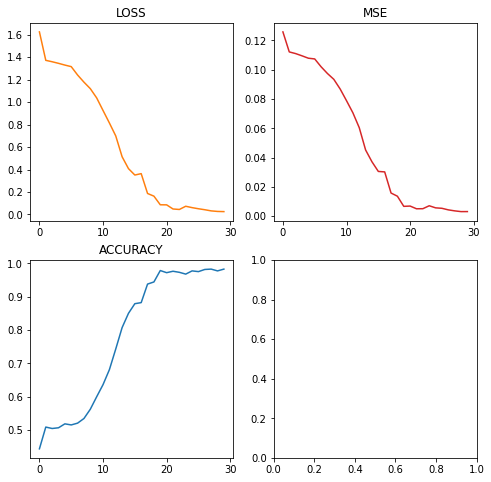

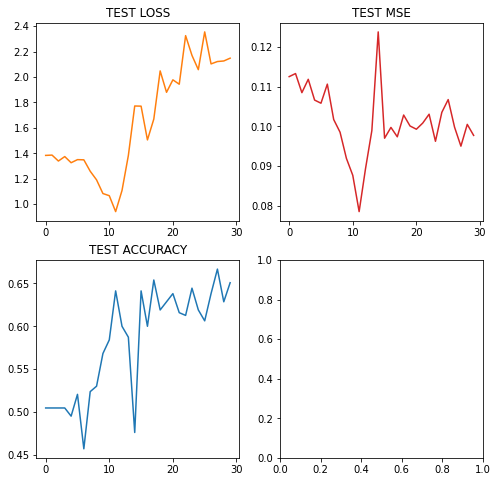

In [ ]:
loss = history['loss']
mse = history['mean_squared_error']
accu = history['accuracy']

val_loss = history['val_loss']
val_mse = history['val_mean_squared_error']
val_accu = history['val_accuracy']

metrics = []
for metric in history:
  metrics.append(history[metric])

etiquetas = []
for nombres_metricas in history:
  etiquetas.append(nombres_metricas)

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(loss,'tab:orange')
ax1.set_title("LOSS")
ax2.plot(mse,'tab:red')
ax2.set_title("MSE")
ax3.plot(accu)
ax3.set_title("ACCURACY")
f.set_figheight(8)
f.set_figwidth(8)


f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(val_loss,'tab:orange')
ax1.set_title("TEST LOSS")
ax2.plot(val_mse,'tab:red')
ax2.set_title("TEST MSE")
ax3.plot(val_accu)
ax3.set_title("TEST ACCURACY")
f.set_figheight(8)
f.set_figwidth(8)

# INFERENCIA > ENTRENAMIENTO

Objetivo   > Clase = 1 | Categoría = red_spider_mite
Predicción > Clase = 1 | Categoría = red_spider_mite
¡Predicción exitosa!


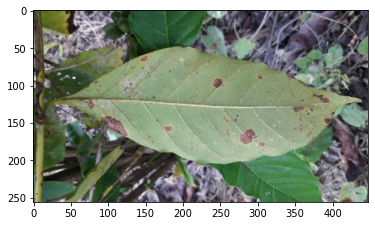

In [ ]:
id = 500
entrada = x_train[id]
clase = y_train[id]

plt.imshow(entrada*0.5+0.5)

prediccion = modelo.predict(x_train[id:id+1])

print("Objetivo   > Clase = "+str(np.argmax(clase))+" | Categoría = "+str(categorias_train[id]))

for i in range(numCategorias):
  if np.argmax(prediccion) == i:
    print("Predicción > Clase = "+str(np.argmax(prediccion))+" | Categoría = "+str(categorias[i]))

if np.argmax(prediccion) == np.argmax(clase):
  print("¡Predicción exitosa!")
else:
  print("Predicción errada :(")

# INFERENCIA > TESTEO

Objetivo   > Clase = 0 | Categoría = healthy
Predicción > Clase = 0 | Categoría = healthy
¡Predicción exitosa!


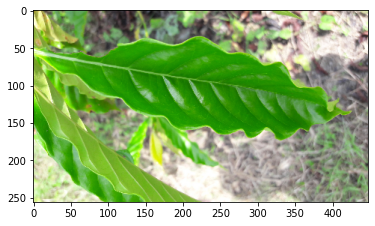

In [ ]:
id = 30
entrada = x_test[id]
clase = y_test[id]

plt.imshow(entrada*0.5+0.5)

prediccion = modelo.predict(x_test[id:id+1])

print("Objetivo   > Clase = "+str(np.argmax(clase))+" | Categoría = "+str(categorias_test[id]))

for i in range(numCategorias):
  if np.argmax(prediccion) == i:
    print("Predicción > Clase = "+str(np.argmax(prediccion))+" | Categoría = "+str(categorias[i]))

if np.argmax(prediccion) == np.argmax(clase):
  print("¡Predicción exitosa!")
else:
  print("Predicción errada :(")

Objetivo   > Clase = 2 | Categoría = rust_level_1
Predicción > Clase = 1 | Categoría = red_spider_mite
Predicción errada :(


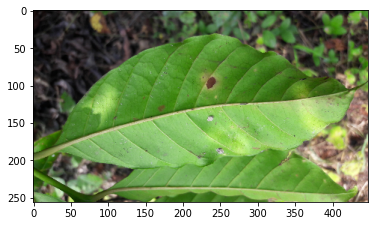

In [ ]:
id = 200
entrada = x_test[id]
clase = y_test[id]

plt.imshow(entrada*0.5+0.5)

prediccion = modelo.predict(x_test[id:id+1])

print("Objetivo   > Clase = "+str(np.argmax(clase))+" | Categoría = "+str(categorias_test[id]))

for i in range(numCategorias):
  if np.argmax(prediccion) == i:
    print("Predicción > Clase = "+str(np.argmax(prediccion))+" | Categoría = "+str(categorias[i]))

if np.argmax(prediccion) == np.argmax(clase):
  print("¡Predicción exitosa!")
else:
  print("Predicción errada :(")

Objetivo   > Clase = 4 | Categoría = rust_level_3
Predicción > Clase = 3 | Categoría = rust_level_2
Predicción errada :(


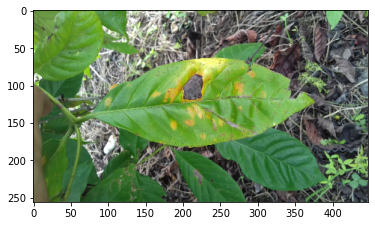

In [ ]:
id = 300
entrada = x_test[id]
clase = y_test[id]

plt.imshow(entrada*0.5+0.5)

prediccion = modelo.predict(x_test[id:id+1])

print("Objetivo   > Clase = "+str(np.argmax(clase))+" | Categoría = "+str(categorias_test[id]))

for i in range(numCategorias):
  if np.argmax(prediccion) == i:
    print("Predicción > Clase = "+str(np.argmax(prediccion))+" | Categoría = "+str(categorias[i]))

if np.argmax(prediccion) == np.argmax(clase):
  print("¡Predicción exitosa!")
else:
  print("Predicción errada :(")

Objetivo   > Clase = 3 | Categoría = rust_level_2
Predicción > Clase = 3 | Categoría = rust_level_2
¡Predicción exitosa!


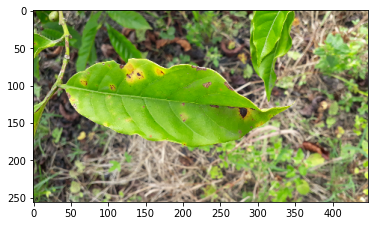

In [ ]:
id = 280
entrada = x_test[id]
clase = y_test[id]

plt.imshow(entrada*0.5+0.5)

prediccion = modelo.predict(x_test[id:id+1])

print("Objetivo   > Clase = "+str(np.argmax(clase))+" | Categoría = "+str(categorias_test[id]))

for i in range(numCategorias):
  if np.argmax(prediccion) == i:
    print("Predicción > Clase = "+str(np.argmax(prediccion))+" | Categoría = "+str(categorias[i]))

if np.argmax(prediccion) == np.argmax(clase):
  print("¡Predicción exitosa!")
else:
  print("Predicción errada :(")

In [ ]:
def calc_exactitud(dataset,x):
  predicciones = modelo.predict(x)
  total_correctas=0
  for i in range(x.shape[0]):
    target = np.argmax(dataset[i][1])
    predict = np.argmax(predicciones[i])
    if target == predict:
      total_correctas+=1
  return total_correctas/x.shape[0]*100

In [ ]:
exactitud_train = calc_exactitud(dataset_train,x_train)
print("La exactitud para los datos de entrenamiento fue del "+str(round(exactitud_train,2))+"%")

La exactitud para los datos de entrenamiento fue del 98.72%


In [ ]:
preds_train = modelo.predict(x_train[0:600])

x_len = 600 # len(dataset_train)

y_true_train = np.zeros([x_len])
y_pred_train = np.zeros([x_len])

for i in range(x_len):
  y_true_train[i] = np.argmax(dataset_train[i][1])
  y_pred_train[i] = np.argmax(preds_train[i])

print("Matriz de Confusión para los datos de entrenamiento")
print(confusion_matrix(y_true_train,y_pred_train))

Matriz de Confusión para los datos de entrenamiento
[[473   1   0   0   0]
 [  0  96   2   1   1]
 [  0   0  26   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


In [ ]:
print("Reporte de Clasificación para los datos de entrenamiento")
print(classification_report(y_true_train,y_pred_train))

Reporte de Clasificación para los datos de entrenamiento
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       474
         1.0       0.99      0.96      0.97       100
         2.0       0.93      1.00      0.96        26
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.99       600
   macro avg       0.58      0.59      0.59       600
weighted avg       1.00      0.99      0.99       600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
exactitud_test = calc_exactitud(dataset_test,x_test)
print("La exactitud para los datos de testeo fue del "+str(round(exactitud_test,2))+"%")

La exactitud para los datos de testeo fue del 65.08%


In [ ]:
preds_test = modelo.predict(x_test)

y_true_test = np.zeros([len(dataset_test)])
y_pred_test = np.zeros([len(dataset_test)])

for i in range(len(dataset_test)):
  y_true_test[i] = np.argmax(dataset_test[i][1])
  y_pred_test[i] = np.argmax(preds_test[i])

print("Matriz de Confusión para los datos de Testeo")
print(confusion_matrix(y_true_test,y_pred_test))

Matriz de Confusión para los datos de Testeo
[[142   6  10   1   0   0]
 [  3  11   9   8   2   1]
 [ 15  10  36   7   1   0]
 [  2   4  12  13   3   0]
 [  1   1   3   5   2   1]
 [  0   1   1   2   1   1]]


In [ ]:
print("Reporte de Clasificación para los datos de testeo")
print(classification_report(y_true_test,y_pred_test))

Reporte de Clasificación para los datos de testeo
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       159
         1.0       0.33      0.32      0.33        34
         2.0       0.51      0.52      0.51        69
         3.0       0.36      0.38      0.37        34
         4.0       0.22      0.15      0.18        13
         5.0       0.33      0.17      0.22         6

    accuracy                           0.65       315
   macro avg       0.44      0.41      0.42       315
weighted avg       0.64      0.65      0.65       315

